___
# PROJETO 1

## <font color='blue'>William Palmieri</font>
___

## <font color='blue'>A inclusão social e a qualidade de vida da população aposentada</font>

## Introdução

Descreva aqui a motivação para escolha dos grupos e o que pretende analisar!

Exemplifique identificando uma pesquisa semelhante feita no Brasil ou no exterior que compare uma parcela da população (apossentados, imigrantes, mulheres, jovens) com todo resto. Critique esta pesquisa (que tipo de variáveis usou? Que recurso de estatística descritiva?). Pode ser um artigo de jornal.


___
## Análise e Resultados

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\1234\Desktop\Insper\2° Semestre\Ciência dos dados\GitHubFake\CD\Projeto1


In [4]:
"""Vamos ler a estrutura da PNAD como um dataframe.
    São muitas colunas e precisamos usar a informação de tamanho para ler a PNAD de fato
    como uma base de tamanho fixo"""
estrutura = pd.read_table("pes_py.txt", sep=";")

In [5]:
estrutura.head()

,Coluna,Tamanho,Título
0,V0101,4,Ano de referência
1,UF,2,Unidade da Federação
2,V0102,6,Número de controle
3,V0103,3,Número de série
4,V0301,2,Número de ordem


In [6]:
notas = pd.read_fwf("PES2014.txt", widths=estrutura.Tamanho, header=None)

In [7]:
notas.head()

,0,1,2,3,4,5,6,7,8,9,...,331,332,333,334,335,336,337,338,339,340
0,2014,11,15,1,1,2,19,8,1987,27,...,3,500,3,3,1,2,2,1,500,20160623
1,2014,11,15,1,2,4,19,1,1986,28,...,3,500,3,4,2,NaN,2,1,500,20160623
2,2014,11,15,1,3,2,14,5,2013,1,...,3,500,3,1,NaN,NaN,NaN,NaN,500,20160623
3,2014,11,15,2,1,2,8,4,1963,51,...,2,1150,4,2,1,2,2,1,1150,20160623
4,2014,11,15,2,2,4,6,11,1970,43,...,2,1150,4,3,1,2,2,1,1150,20160623


In [8]:
estrutura.columns

Index(['Coluna', 'Tamanho', 'Título'], dtype='object')

In [9]:
notas.columns = estrutura.iloc[:,0]

In [10]:
notas["Região"] = notas.UF

def Região(uf):
    if uf < 18:
        return "Norte"
    elif uf < 30:
        return "Nordeste"
    elif uf < 36:
        return "Sudeste"
    elif uf < 44:
        return "Sul"
    else:
        return "Centro-oeste"

notas.Região = notas.Região.map(Região)

In [11]:
#Renomeando o Sexo
notas.V0302 = notas.V0302.astype('category')
notas.V0302.cat.categories= ('Masculino', 'Feminino')
#Renomeando a Raça
notas.V0404 = notas.V0404.astype('category')
notas.V0404.cat.categories= ('Branca', 'Preta', 'Amarela', 'Parda', 'Indígena', "ND")
#Renomeando a Alfabetização
notas.V0601 = notas.V0601.astype('category')
notas.V0601.cat.categories= ('Sim', 'Não')
#Renomeando os Estados
notas.UF = notas.UF.astype('category')
notas.UF.cat.categories=('RR', 'AC', 'AM', 'RO', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC', 'RS', 'MS', 'MT', 'GO', 'DF')
#Renomeando o Acesso à Internet
notas.V06111 = notas.V06111.astype('category')
notas.V06111.cat.categories= ('Sim', 'Não',)
#Renomeando o Acesso à Internet
notas.V06112 = notas.V06112.astype('category')
notas.V06112.cat.categories= ('Sim', 'Não')
#Renomeando o Trabalho no ano
notas.V0701 = notas.V0701.astype('category')
notas.V0701.cat.categories= ('Sim', 'Não')
#Renomeando Procura de Emprego
notas.V9115 = notas.V9115.astype('category')
notas.V9115.cat.categories= ('Sim', 'Não')
#Renomeando Rendimentos extras
notas.V9124 = notas.V9124.astype('category')
notas.V9124.cat.categories= ('Sim', 'Não')
#Renomeando Anos Estudados
notas.V4803 = notas.V4803.astype('category')
notas.V4803.cat.categories= ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15 ou mais', 'ND')
#Renomeando Rendimentos extras
notas.V4747 = notas.V4747.astype('category')
notas.V4747.cat.categories= ('Agrícola', 'Não-Agrícola')
#Renomeando Apsentados
notas.V9122 = notas.V9122.astype('category')
notas.V9122.cat.categories= ('Sim', 'Não')



In [12]:
tab = pd.DataFrame()


tab["Sexo"] = notas.V0302
tab["Raça"] = notas.V0404
tab["Alfabetizado"] = notas.V0601
tab["Estado"] = notas.UF
tab["Regiao"] = notas.Região
tab["Internet"] = notas.V06111
tab["Celular"] = notas.V06112
tab["Trabalhou no ano"] = notas.V0701
tab["Procurando emprego"] = notas.V9115
tab["Rendimentos fora do trabalho"] = notas.V9124
tab["Anos de estudo"] = notas.V4803
tab["Renda"] = notas.V4720
tab["Integrantes da família"] = notas.V4724
tab["Trabalho"] = notas.V4747
tab["Idade"] = notas.V8005
tab["Aposentado"] = notas.V9122
tab["Jovem"] = (notas.V8005 <=19)

In [13]:
tab

,Sexo,Raça,Alfabetizado,Estado,Regiao,Internet,Celular,Trabalhou no ano,Procurando emprego,Rendimentos fora do trabalho,Anos de estudo,Renda,Integrantes da família,Trabalho,Idade,Aposentado,Jovem
0,Masculino,Amarela,Sim,RR,Norte,Não,Sim,NaN,Não,Não,8,1500,3,Não-Agrícola,27,Não,False
1,Feminino,Preta,Sim,RR,Norte,Não,Sim,NaN,Não,Não,10,0,3,NaN,28,Não,False
2,Masculino,Preta,Não,RR,Norte,NaN,NaN,NaN,NaN,NaN,0,NaN,3,NaN,1,NaN,True
3,Masculino,Preta,Sim,RR,Norte,Sim,Sim,NaN,Não,Não,5,1200,2,Não-Agrícola,51,Não,False
4,Feminino,Preta,Sim,RR,Norte,Sim,Sim,NaN,Não,Não,8,1100,2,Não-Agrícola,43,Não,False
5,Feminino,Preta,Sim,RR,Norte,Não,Não,NaN,Não,NaN,2,724,1,NaN,77,Sim,False
6,Feminino,Preta,Sim,RR,Norte,Sim,Sim,NaN,Não,Não,9,0,5,NaN,39,Não,False
7,Masculino,Preta,Sim,RR,Norte,Sim,Sim,NaN,Não,Não,0,7000,5,Não-Agrícola,60,Não,False
8,Feminino,Preta,Sim,RR,Norte,Sim,Sim,NaN,Não,Não,9,1500,5,Não-Agrícola,16,Não,True
9,Masculino,Preta,Sim,RR,Norte,Sim,Sim,NaN,Não,Não,8,0,5,NaN,15,Não,True


O intúito do trabalho é analisar a população de aposentados no brasil. 

Aqui vemos a quantidade de Aposentados por Região, comparando-a com a quantidade de não-aposentados.

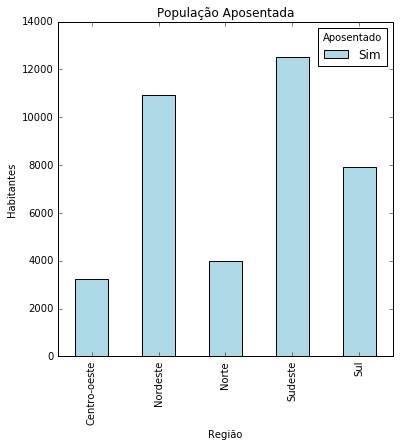

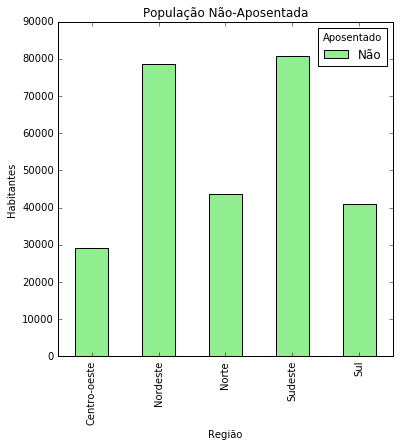

In [32]:
rg_ap = pd.crosstab (notas.Região, tab.Aposentado)
rg_ap_true = rg_ap.iloc[:, 0:1]

rg_ap_true.plot.bar(color=('lightblue'), stacked=False, figsize = (6,6))
plt.title("População Aposentada")
plt.xlabel("Região")
plt.ylabel("Habitantes")


rg_nap = pd.crosstab (notas.Região, tab.Aposentado)
rg_nap_true = rg_nap.iloc[:, 1:2]

rg_nap_true.plot.bar(color=('lightgreen'), stacked=False, figsize = (6,6))
plt.title("População Não-Aposentada")
plt.xlabel("Região")
plt.ylabel("Habitantes")

<p>IDH do Brasil = 0,816 </p>
<p> </p>
<p> </p>

<p>IDH da Região Sul = 0,850 </p>
<p>IDH da Região Sudeste = 0,847   </p>
<p>IDH da Região Centro-Oeste = 0,838  </p>
<p>IDH da Região Norte = 0,786 </p>
<p>IDH da Região Nordeste = 0,749 </p>

<p>Ao analisarmos, percebemos que a população de aposentados está distribuida pelo país de forma semelhanta à população de não-aposentados. Assim, baseando-se também no IDH médio de cada regão, podemos presumir que a qualidade de vida dos dois grupos é semelhante.</p>
<p> Entretanto, somente esse dado não é suficiente para definir se os aposentados tem uma qualidade de vida melhor ou pior</p>
<p>Assim, vamos analisar a renda dos aposentados e compará-la com a renda da população</p>

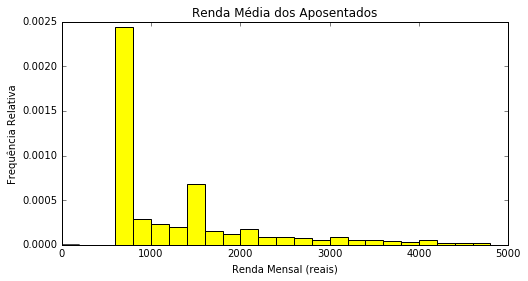

In [87]:
faixa = np.arange(0,120,10)
faixa2 = np.arange(0,5000,200)

#Renda média dos aposentados
renda_ap = tab.Renda[tab.Aposentado == "Sim"]
renda_ap.describe()

#Plotando a RM
renda_ap.plot.hist(bins=faixa2, normed=1, color="yellow", figsize = (8, 4))
plt.title("Renda Média dos Aposentados")
plt.xlabel("Renda Mensal (reais)")
plt.ylabel("Frequência Relativa")

O histograma acima mostra a renda dos aposentados. Pode-se notar que não existe ninguém que ganhe menos que um salário mínimo. Além disso, há um grande pico na faixa de 1 salário mínimo. O restante do histograma decai quase que proporcionalmente, exceto por alguns picos que ficam nas regiões de valores de salário mínimo exatos.    

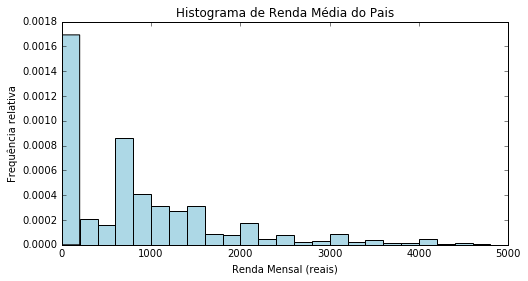

In [88]:
#Plotando a RM
tab.Renda.plot.hist(bins=faixa2, normed=1, color="lightblue", figsize = (8, 4))
plt.title("Histograma de Renda Média do Pais")
plt.xlabel("Renda Mensal (reais)")
plt.ylabel("Frequência relativa")

<p> O histograma de renda média mostra que muitas das pessoas intrevistadas não possuem renda. Além disso, é notável que a renda, no geral, fica abaixo da renda dos aposentados.</p>
<p>Para melhor comparação, farei uma sobreposição dos histogramas</p>

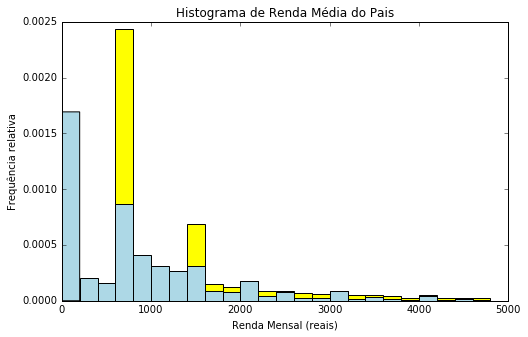

In [101]:

#Renda média dos aposentados
renda_ap = tab.Renda[tab.Aposentado == "Sim"]
renda_ap.describe()

#Plotando a RM
renda_ap.plot.hist(bins=faixa2, normed=1, color="yellow", figsize = (8, 8))
plt.title("Renda Média dos Aposentados")
plt.xlabel("Renda Mensal (reais)")
plt.ylabel("Frequência Relativa")

#Plotando a RM
tab.Renda.plot.hist(bins=faixa2, normed=1, color="lightblue", figsize = (8, 5))
plt.title("Histograma de Renda Média do Pais")
plt.xlabel("Renda Mensal (reais)")
plt.ylabel("Frequência relativa")

<p>O histograma acima é uma sobreposição de dois histogramas anteriores: Renda de Aposentados(Amarelo) x  Renda da Poupulação total (Azul Claro). Assim, podemos comparar com maior precisão a  diferença dos salários. </p>
<p>Temos, então, a certeza de que aposentados têm a mediana da renda maior</p>

<p>Além da renda e do IDH da região, um bom indicador seria a alfabetização que, além de medir a qualidade de vida,  indica também a inserção social dos aposentados na sociedade, visto que a habilidade de ler e escrever é tida como parte inerente da existência do homem como um ser social. </p>
<p>A seguir, farei o gráfico de alfabetismo entre a população aposentada e a não-aposentada.</p>

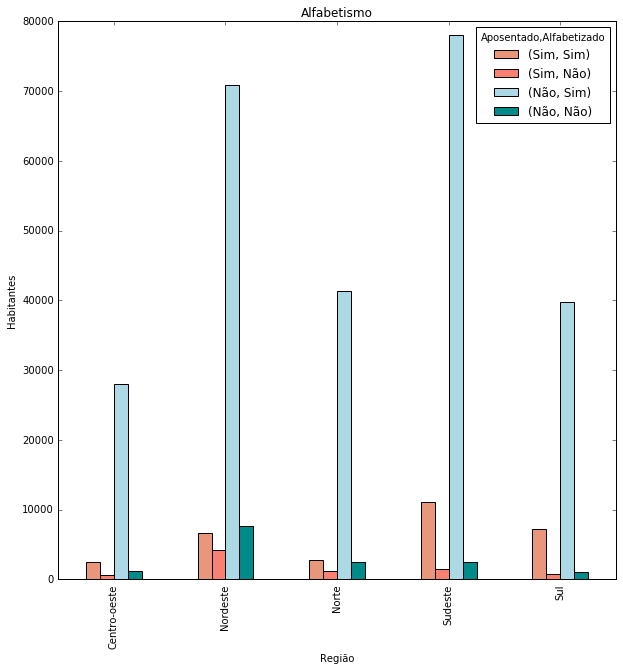

In [108]:
rg_ni_idoso_A = pd.crosstab (notas.Região, [tab.Aposentado,tab.Alfabetizado])
rg_ni_idoso_A_cut = rg_ni_idoso_A.iloc[:, :]

rg_ni_idoso_A_cut.plot.bar(color=("darksalmon", "salmon", "lightblue", "darkcyan"), stacked=False, figsize = (10,10))
plt.title("Alfabetismo")
plt.xlabel("Região")
plt.ylabel("Habitantes")

<p>Como a diferença de população é bastante grande, uma representação em pizza seria melhor para analisar os valores relativos de alfabetização.</p>
<p> Assim, farei um gráfico de Alfabetização da população aposentada e da população não-aposentada<p>

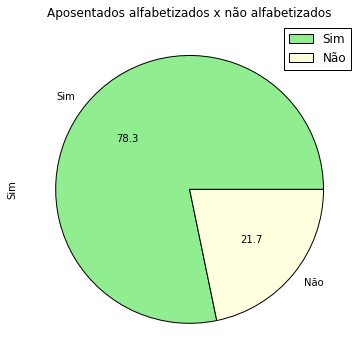

In [136]:
ap_A = pd.crosstab (tab.Alfabetizado, tab.Aposentado)
ap_A_cut = ap_A.iloc[:, 0:1]
ap_A_cut

ap_A_cut.plot(kind='pie', colors=('lightgreen', 'lightyellow'), autopct="%0.1f",legend=True, subplots=True, figsize=(6,6))
plt.title("Aposentados alfabetizados x não alfabetizados")

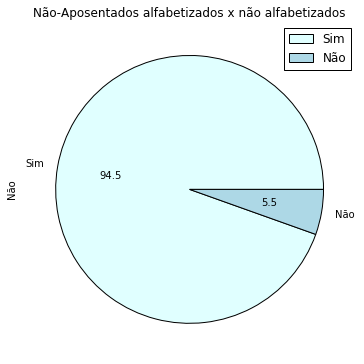

In [135]:
ap_A = pd.crosstab (tab.Alfabetizado, tab.Aposentado)
nap_A_cut = ap_A.iloc[:, 1:2]
nap_A_cut

nap_A_cut.plot(kind='pie', colors=('lightcyan', 'lightblue'), autopct="%0.1f",legend=True, subplots=True, figsize=(6,6))
plt.title("Não-Aposentados alfabetizados x não alfabetizados")

<p> Se compararmos os gráficos, veremos que a população não-aposentada é mais alfabetizada que a população aposentada.</p>
<p>Isso nos diz que, no que diz respeito à qualidade de vida, de um modo geral, os aposentados estão em equilíbrio com o restante da sociedade, pois, ainda que tenham índices de analfabetismo maiores, sua renda mostra que esse fator não foi o suficiente para causar uma 
<p> Com isso, podemos ter indícios de que existe uma "Separação Social" entre aposentados e não-aposentados. Entretanto, para se ter mais certeza da análise, devemos comparar outros dados.</p>
<p> Seguindo a linha de raciocínio, pegarei o dado que diz respeito ao uso de internet, pois esta é cada vez mais utilizada na sociedade e não ter o acesso à ela pode ser visto como um isolamento sócio-cultural </p>

In [104]:
#tab[tab.Renda <= 5000].Renda.plot.box() ##################################################  LEEEEEEEEEEE   ######
#plt.title("Boxplot de Renda Média do Pais")
#plt.ylabel("Renda Mensal (reais)")

In [60]:
tab.Renda.describe()
faixa2 = np.arange(0,6000,200)


count    3.117610e+05
mean     1.605397e+10
std      1.256833e+11
min      0.000000e+00
25%      0.000000e+00
50%      7.240000e+02
75%      1.400000e+03
max      1.000000e+12
Name: Renda, dtype: float64

In [58]:
a = tab.Renda.describe()[['50%']]
b = renda_ap.describe()[['50%']]

print (a, b)

50%    724
Name: Renda, dtype: float64 50%    1000
Name: Renda, dtype: float64


In [21]:
#rg_ap = pd.crosstab (notas.Região, tab.Aposentado)
#rg_ap_true = rg_ap.iloc[:, 0:1]
#rg_ap_true.plot.bar(color=('lightblue'), stacked=False, figsize = (8,8))
#plt.title("População Aposentada")
#plt.xlabel("Região")
#plt.ylabel("Habitantes")

#rg_j = pd.crosstab (notas.Região, tab.Jovem)
#rg_j_true = rg_j.iloc[:, 0:1]
#rg_j_true.plot.bar(color=('lightgreen'), stacked=False, figsize = (8,8))
#plt.title("População Jovem")
#plt.xlabel("Região")
#plt.ylabel("Habitantes")

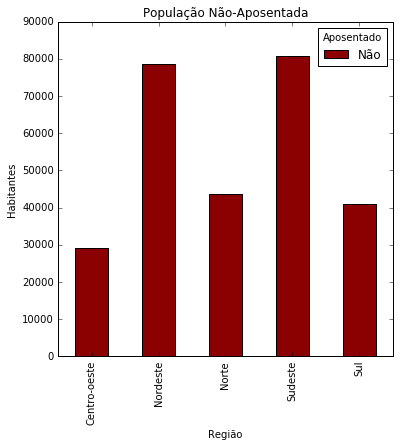

In [33]:
rg_idoso = pd.crosstab (notas.Região, tab.Aposentado)
rg_nidoso_true = rg_idoso.iloc[:, 1:2]
rg_nidoso_true.plot.bar(color=('darkred'), stacked=False, figsize = (6,6))
plt.title("População Não-Aposentada")
plt.xlabel("Região")
plt.ylabel("Habitantes")

In [24]:
#uf_idoso_A_cut.plot.bar(color=("darkcyan", "lightcyan", "darksalmon", "salmon"), stacked=False, figsize = (15,15))
#plt.title("Alfabetização da População Idosa")
#plt.xlabel("Estado")
#plt.ylabel("Habitantes")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019F876DC780>], dtype=object)

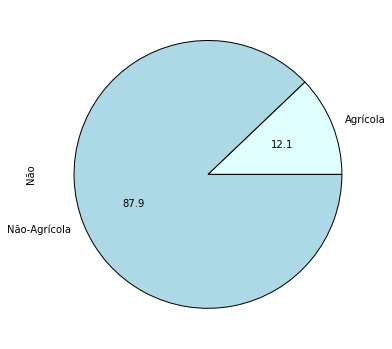

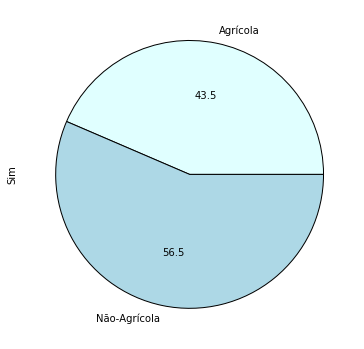

In [35]:
uf_ap_T = pd.crosstab(tab.Trabalho, tab.Aposentado)
uf_ap_T_cut = uf_ap_T.iloc[0:2, 1:2]

uf_ap_T_cut.plot(kind='pie', colors=('lightcyan', 'lightblue'), autopct="%0.1f",legend=False, subplots=True, figsize=(6,6))

uf_nap_T = pd.crosstab(tab.Trabalho, tab.Aposentado)
uf_nap_T_cut = uf_nap_T.iloc[0:2, 0:1]
uf_nap_T_cut.plot(kind='pie', colors=('lightcyan', 'lightblue'), autopct="%0.1f",legend=False, subplots=True, figsize=(6,6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019F872B4550>], dtype=object)

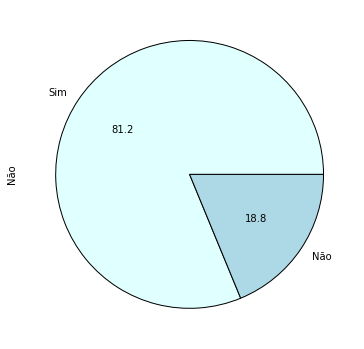

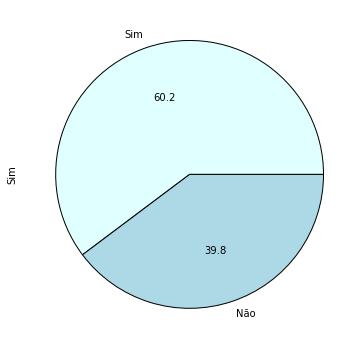

In [36]:
ap_C = pd.crosstab(tab.Celular, tab.Aposentado)
ap_C_cut = ap_C.iloc[0:2, 1:2]

ap_C_cut.plot(kind='pie', colors=('lightcyan', 'lightblue'), autopct="%0.1f",legend=False, subplots=True, figsize=(6,6))

nap_C = pd.crosstab(tab.Celular, tab.Aposentado)
nap_C_cut = nap_C.iloc[0:2, 0:1]
nap_C_cut.plot(kind='pie', colors=('lightcyan', 'lightblue'), autopct="%0.1f",legend=False, subplots=True, figsize=(6,6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019F87673EF0>], dtype=object)

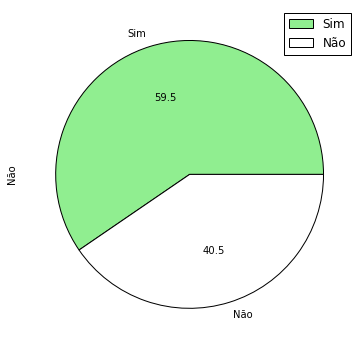

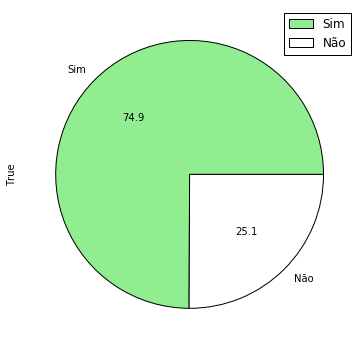

In [37]:
ap_I = pd.crosstab(tab.Internet, tab.Aposentado)
ap_I_cut = ap_I.iloc[0:2, 1:2]

ap_I_cut.plot(kind='pie', colors=('lightgreen', 'white'), autopct="%0.1f",legend=True, subplots=True, figsize=(6,6))

nap_I = pd.crosstab(tab.Internet, tab.Jovem)
nap_I_cut = nap_I.iloc[0:2, 1:2]
nap_I_cut.plot(kind='pie', colors=('lightgreen', 'white'), autopct="%0.1f",legend=True, subplots=True, figsize=(6,6))

In [ ]:
#uf_idoso_A = pd.crosstab (notas.UF, [tab.Idoso, "Alfabetizado"])
#uf_idoso_A
#uf_idoso.plot.bar(color=("lightcyan", "darkcyan"), stacked=False, figsize = (12,12))
#plt.title("População Idosa")
#plt.xlabel("Estado")
#plt.ylabel("Habitantes")

___
## Conclusão 

Descreva aqui suas conclusões!